In [27]:
import tweepy
import pandas as pd
import time
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from textblob import TextBlob
from dotenv import load_dotenv

In [28]:
load_dotenv()

TWITTER_CONSUMER_KEY = os.getenv('TWITTER_CONSUMER_KEY')
TWITTER_CONSUMER_SECRET = os.getenv('TWITTER_CONSUMER_SECRET')
TWITTER_ACCESS_TOKEN = os.getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_TOKEN_SECRET = os.getenv('TWITTER_ACCESS_TOKEN_SECRET')


auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [29]:
text_query = 'depression'
count = 1000
try:
 tweets = tweepy.Cursor(api.search_tweets,q=text_query).items(count)
 tweets_list = [[tweet.created_at, tweet.user.screen_name,tweet.favorite_count,tweet.retweet_count, tweet.text] for tweet in tweets]
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [30]:
tweets_df.head()

,0,1,2,3,4
0,2021-12-05 13:59:18+00:00,aProgrammerBot,0,16,"RT @James404kush: Taking my mind, body and sou..."
1,2021-12-05 13:59:14+00:00,rsitgirl,0,0,seasonal depression just started hitting
2,2021-12-05 13:59:12+00:00,TheSecretJunio1,0,16,"RT @James404kush: Taking my mind, body and sou..."
3,2021-12-05 13:59:12+00:00,TheSecretJunio1,0,16,"RT @James404kush: Taking my mind, body and sou..."
4,2021-12-05 13:59:12+00:00,TheSecretJunio1,0,16,"RT @James404kush: Taking my mind, body and sou..."


In [31]:
tweets_df.columns=['date','user','likes','retweets','text']

rearranged_col_names=['date','user','text','likes','retweets']
tweets_df=tweets_df[rearranged_col_names]
tweets_df.head()

,date,user,text,likes,retweets
0,2021-12-05 13:59:18+00:00,aProgrammerBot,"RT @James404kush: Taking my mind, body and sou...",0,16
1,2021-12-05 13:59:14+00:00,rsitgirl,seasonal depression just started hitting,0,0
2,2021-12-05 13:59:12+00:00,TheSecretJunio1,"RT @James404kush: Taking my mind, body and sou...",0,16
3,2021-12-05 13:59:12+00:00,TheSecretJunio1,"RT @James404kush: Taking my mind, body and sou...",0,16
4,2021-12-05 13:59:12+00:00,TheSecretJunio1,"RT @James404kush: Taking my mind, body and sou...",0,16


In [32]:
# Sort dataframe by date column
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
tweets_df = tweets_df.sort_values(by='date',ascending=True)
tweets_df = tweets_df.reset_index().drop('index',axis=1)
tweets_df.head()

,date,user,text,likes,retweets
0,2021-12-05 13:24:50+00:00,Ad5eL28,"5 stages of zzzzz, denial, anger, bargaining, ...",0,0
1,2021-12-05 13:24:51+00:00,IIMaddoxII,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2450
2,2021-12-05 13:24:51+00:00,mattonaroof,RT @erinpaigerod: is depression lasagna a thin...,0,31
3,2021-12-05 13:24:53+00:00,McNeedo,RT @SG_AllStars: Im November 2017 ist @YunasSw...,0,8
4,2021-12-05 13:24:54+00:00,aboiii98,RT @ShahAlMuslim: ‼️FRIENDLY REMINDER to ALL #...,0,3


In [33]:
print(tweets_df.shape)
tweets_df = tweets_df.drop_duplicates('text')
tweets_df.shape

(1000, 5)


(630, 5)

In [34]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(tweets_df['likes'])
rt_max = np.max(tweets_df['retweets'])

fav = tweets_df[tweets_df.likes == fav_max].index[0]
rt = tweets_df[tweets_df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(tweets_df['text'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(tweets_df['text'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
It’s okay to have breakdowns, anxiety and depression.

What not okay is to give up.

“Live longer, you’d see.” https://t.co/fiW2cefBbW
Number of likes: 18

The tweet with more retweets is: 
RT @dietz_meredith: no they’re not “symptoms of depression.” they’re blues clues
Number of retweets: 47048


<AxesSubplot:xlabel='date'>

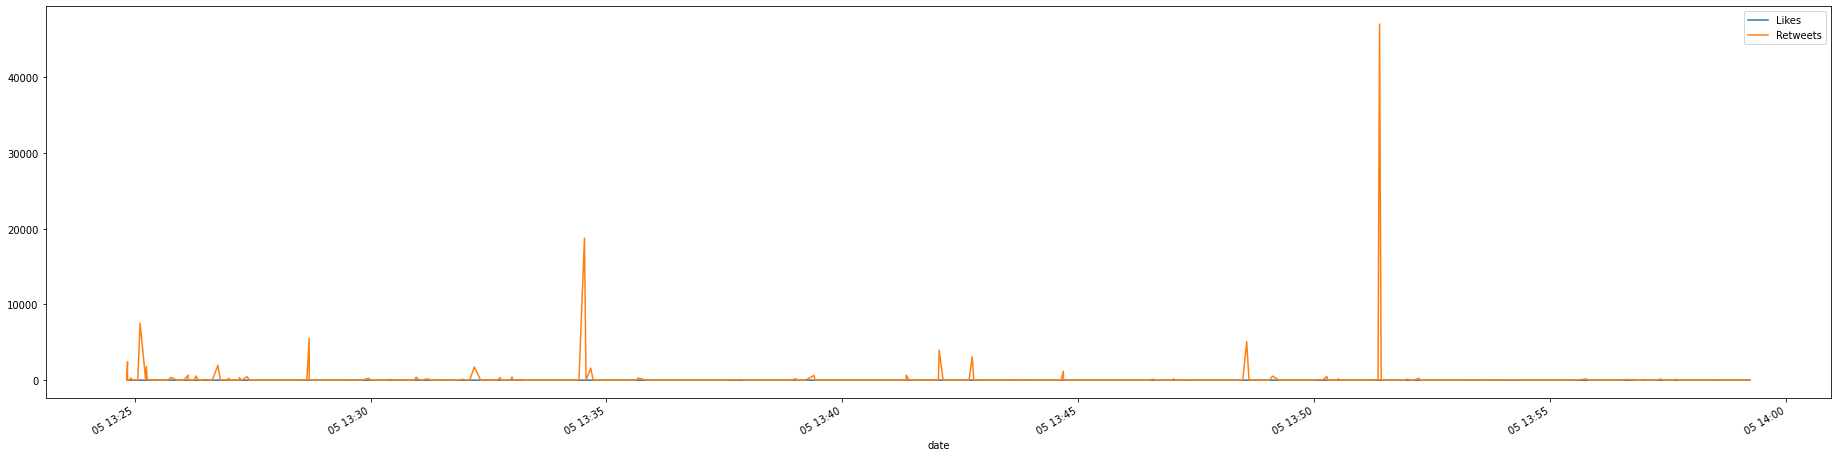

In [35]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=tweets_df['likes'].values, index=tweets_df['date'])
tret = pd.Series(data=tweets_df['retweets'].values, index=tweets_df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Likes", legend=True)
tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [36]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)

    return hashtags

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codevardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
HT_regular = hashtag_extract(tweets_df['text'])

# unnesting list
HT_unnested = sum(HT_regular,[])

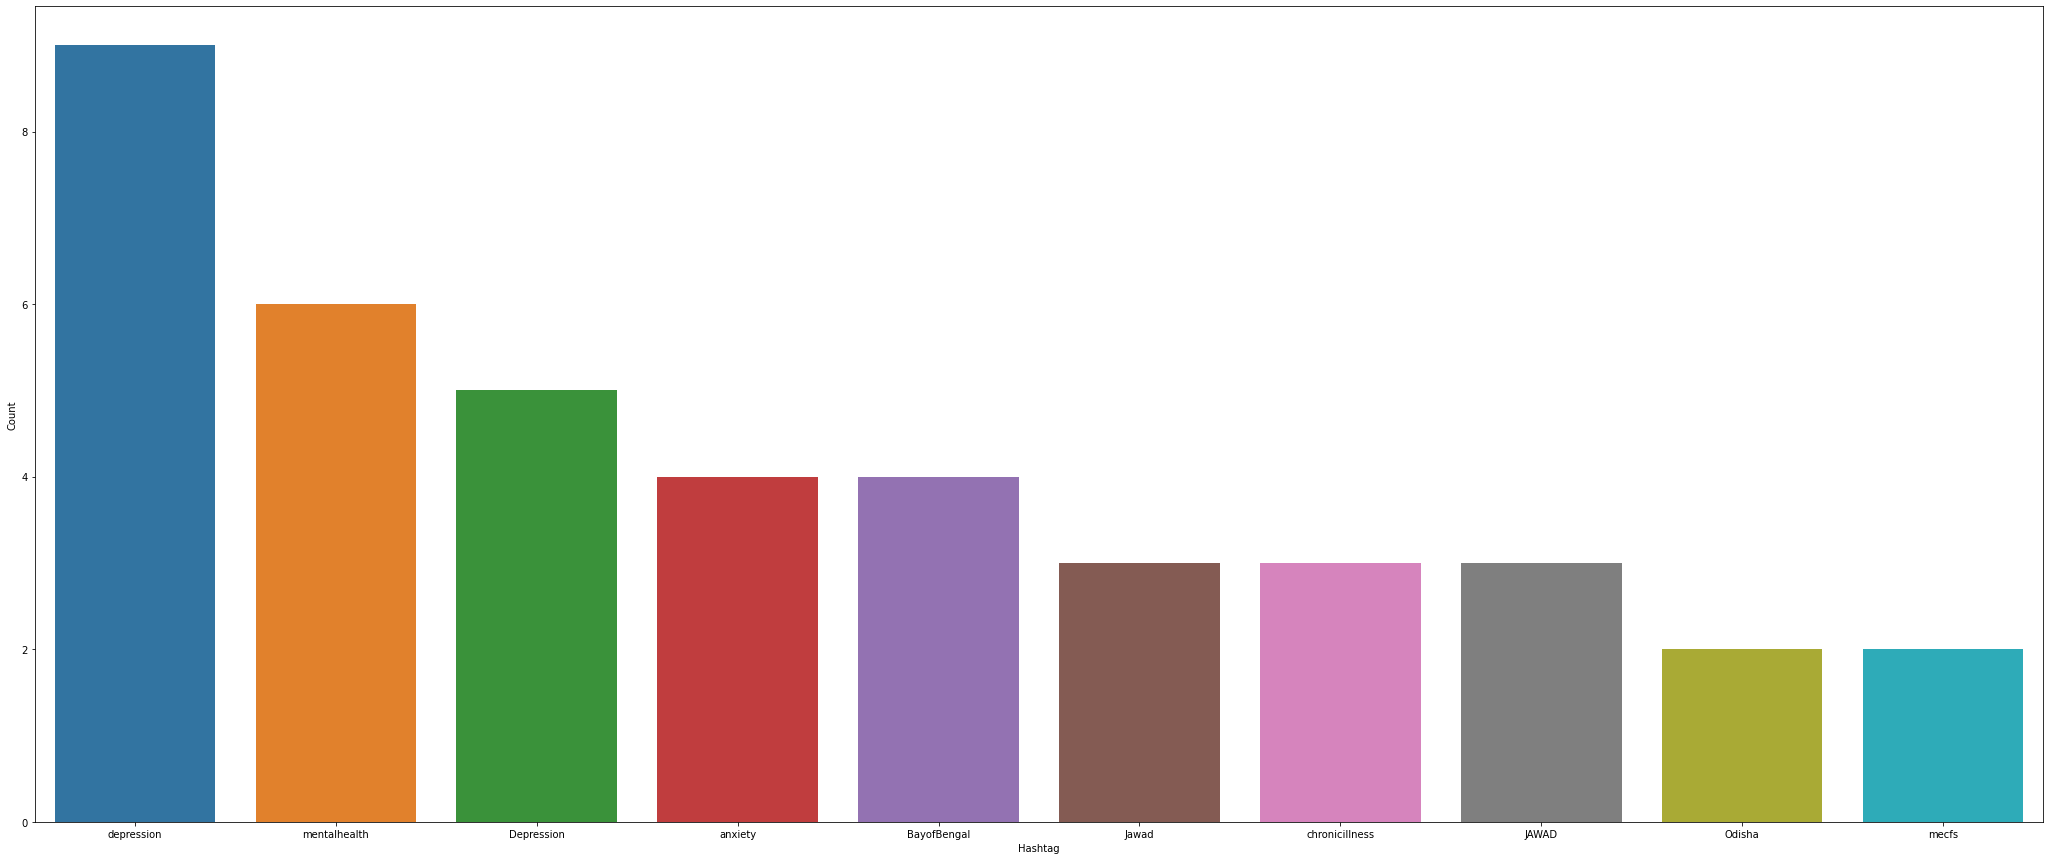

In [39]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [40]:
tweets_df['likes'].corr(tweets_df['retweets'])

-0.02485212489252708

<AxesSubplot:xlabel='likes', ylabel='retweets'>

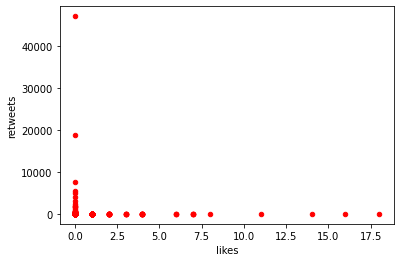

In [41]:
tweets_df.plot.scatter(x='likes',y='retweets',c='r')

In [42]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#
#df1 = df.loc['0':'5', 'text': ]
tweets_df['clean_text'] = tweets_df['text'].apply(processTweet)
tweets_df.head()


,date,user,text,likes,retweets,clean_text
0,2021-12-05 13:24:50+00:00,Ad5eL28,"5 stages of zzzzz, denial, anger, bargaining, ...",0,0,stages zzzzz denial anger bargaining depressio...
1,2021-12-05 13:24:51+00:00,IIMaddoxII,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2450,denial\nanger\nbargaining\ndepression\nmemes
2,2021-12-05 13:24:51+00:00,mattonaroof,RT @erinpaigerod: is depression lasagna a thin...,0,31,depression lasagna thing and can somebody plea...
3,2021-12-05 13:24:53+00:00,McNeedo,RT @SG_AllStars: Im November 2017 ist @YunasSw...,0,8,november 2017 ist als zweitbesetzung für victo...
4,2021-12-05 13:24:54+00:00,aboiii98,RT @ShahAlMuslim: ‼️FRIENDLY REMINDER to ALL #...,0,3,‼️friendly reminder all who love cfchem ✅ice i...


In [43]:
# drop duplicates
tweets_df = tweets_df.drop_duplicates('clean_text')
tweets_df.shape

(584, 6)

In [44]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

tweets_df['category'] = tweets_df['clean_text'].apply(analyze_sentiment)
tweets_df.head()

/tmp/ipykernel_17761/4271762893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['category'] = tweets_df['clean_text'].apply(analyze_sentiment)


,date,user,text,likes,retweets,clean_text,category
0,2021-12-05 13:24:50+00:00,Ad5eL28,"5 stages of zzzzz, denial, anger, bargaining, ...",0,0,stages zzzzz denial anger bargaining depressio...,-1
1,2021-12-05 13:24:51+00:00,IIMaddoxII,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2450,denial\nanger\nbargaining\ndepression\nmemes,-1
2,2021-12-05 13:24:51+00:00,mattonaroof,RT @erinpaigerod: is depression lasagna a thin...,0,31,depression lasagna thing and can somebody plea...,0
3,2021-12-05 13:24:53+00:00,McNeedo,RT @SG_AllStars: Im November 2017 ist @YunasSw...,0,8,november 2017 ist als zweitbesetzung für victo...,-1
4,2021-12-05 13:24:54+00:00,aboiii98,RT @ShahAlMuslim: ‼️FRIENDLY REMINDER to ALL #...,0,3,‼️friendly reminder all who love cfchem ✅ice i...,0


In [45]:
# check the number of positive vs. negative tagged sentences
positives = tweets_df['category'][tweets_df.category == 1]
negatives = tweets_df['category'][tweets_df.category == -1]
neutrals = tweets_df['category'][tweets_df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(tweets_df.shape[0]))

number of positve categorized text is:  168
number of negative categorized text is: 133
number of neutral categorized text is: 283
total length of the data is:            584


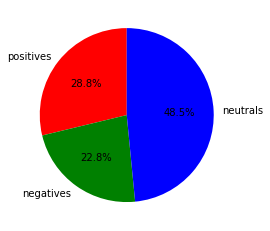

In [46]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [47]:
# tokenize helper function
import string
from nltk.corpus import stopwords

def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['depression','suicide','kill','depressed','hated','cry','…','death’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
tweets_df = tweets_df.copy()
tweets_df['tokens'] = tweets_df['clean_text'].apply(text_process) # tokenize style 1
tweets_df['no_sad'] = tweets_df['tokens'].apply(remove_words) #tokenize style 2
tweets_df = tweets_df.drop(['tokens'],axis=1)
tweets_df.head()

,date,user,text,likes,retweets,clean_text,category,no_sad
0,2021-12-05 13:24:50+00:00,Ad5eL28,"5 stages of zzzzz, denial, anger, bargaining, ...",0,0,stages zzzzz denial anger bargaining depressio...,-1,"[stages, zzzzz, denial, anger, bargaining, acc..."
1,2021-12-05 13:24:51+00:00,IIMaddoxII,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2450,denial\nanger\nbargaining\ndepression\nmemes,-1,"[denial, anger, bargaining, memes]"
2,2021-12-05 13:24:51+00:00,mattonaroof,RT @erinpaigerod: is depression lasagna a thin...,0,31,depression lasagna thing and can somebody plea...,0,"[lasagna, thing, somebody, please, bring, one]"
3,2021-12-05 13:24:53+00:00,McNeedo,RT @SG_AllStars: Im November 2017 ist @YunasSw...,0,8,november 2017 ist als zweitbesetzung für victo...,-1,"[november, 2017, ist, als, zweitbesetzung, für..."
4,2021-12-05 13:24:54+00:00,aboiii98,RT @ShahAlMuslim: ‼️FRIENDLY REMINDER to ALL #...,0,3,‼️friendly reminder all who love cfchem ✅ice i...,0,"[‼️friendly, reminder, love, cfchem, ✅ice, ill..."


In [48]:
tweets_df=tweets_df.drop(["likes", "date","user","retweets","text","no_sad"], axis = 1)
tweets_df.to_csv("data/tweets.csv")
tweets_df.head()

,clean_text,category
0,stages zzzzz denial anger bargaining depressio...,-1
1,denial\nanger\nbargaining\ndepression\nmemes,-1
2,depression lasagna thing and can somebody plea...,0
3,november 2017 ist als zweitbesetzung für victo...,-1
4,‼️friendly reminder all who love cfchem ✅ice i...,0
